# Circuito RLC - Atividade desenvolvida na disciplina de introdução à programação em física. Departamento de Física - UFMG

### Taynara Vitória de  Souza    

## Introdução

Um circuito RLC (também conhecido como circuito ressonante ou circuito aceitador) é um circuito elétrico consistindo de um resistor(R), um indutor(L), e um capacitor(C), conectados em série ou em paralelo.
A equação que descreve a corrente no circuito é: 

\begin{equation}
\frac{dV}{dt} = R \frac{dI}{dt} + L \frac{d^2I}{dt^2} + \frac{I}{C}
\end{equation}

Contudo, comprender a equação em questão e a relação entre suas variáveis não é tão simples. Nesse sentindo, utilizando recursos computacionais é possível facilitar esse estudo através da construções de gráficos. Dessa forma, ao longo desse trabalho, utilizaremos o python para estudar os resultados do circuito RLC. 

## 1. Corrente e Voltagem em função do tempo

Para os valores fixos da Resistência($R= 1000/1.5\Omega$), da indutância($ L= 1000 Henry $) e da capacitância ($C=1/1000 Faradios$), sendo $\omega = 1/\sqrt{LC}$ plotou-se na mesma imagem a corrente e a voltagem em função do tempo. 
É importante destacar que não existe corrente imaginária. Assim sendo, foi utilizada a class Complex2, que torna possível trabalhar com a parte desejada para a resolução do problema.


Diante das equações envolvidas, o grafico gerado será senoidal haja visa que, a corrente é dada por $I(t)=\frac{V_0}{|Z|} \left[\cos(\omega t + \theta) - i \sin(\omega t + \theta) \right]$ e a voltagem é dada por $V=V_0cos(\omega t+\theta)$ . Não obstante, pode-se concluir que a fase da corrente é menor do que a da tensão. Esse atraso da corrente é visível no gráfico das funções, porque olhando para os valores máximos dessas duas funções, primeiro ocorre o máximo de V(t) e a seguir o de I(t).

In [4]:
import math

class Complex2:
# self é uma palavra reservada em python, e se refere ao objeto 
# asociado a clase, note que agora não precisamos definir z
                                                                                                  
        def __init__(self,x,y):
                self.re = x
                self.im = y
                
# a palavra reservada other, terá as mesmas caracteristicas que self

        def soma(self, other):
                return Complex2(self.re + other.re , self.im + other.im)

        def subs(self,other):
                return Complex2(self.re - other.re , self.im - other.im)

        def mult(self,other):
                return Complex2(self.re*other.re - self.im*other.im,
                                self.re*other.im + self.im*other.re )
        def abs(self):
                return (self.re**2 + self.im**2)**0.5
        
        def theta(self):
                return math.atan(self.im/self.re)
        
        def real(self):
                return self.re
        
        def __repr__(self):
                return '(%f, %f)' %(self.re, self.im)

In [5]:
a = Complex2(3,4)
Complex2.theta(a)

0.9272952180016122

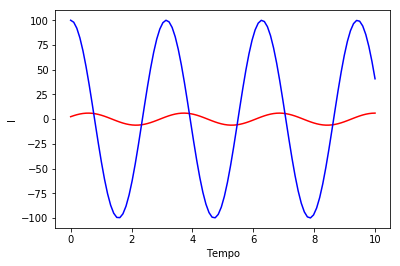

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def corrente(w,Vo,t,Z):
 return Complex2(Vo/Complex2.abs(Z)*math.cos(w*t+Complex2.theta(Z)),-Vo/Complex2.abs(Z)*math.sin(w*t+Complex2.theta(Z)))

def voltagem(Vo,w,t):
    return Complex2((Vo*math.cos(w*t)),-Vo*math.sin(w*t))

R = 1000/1.5
L = 1000
C = 1/1000
w = 2/(L*C)**0.5
Z = Complex2(R,(1/(w*C))-w*L)
I=[]
V=[]
Vo=100
t=np.linspace(0,10,100)


for i in range(100):
    I.append(corrente(w,Vo,t[i],Z))
    V.append(voltagem(Vo,w,t[i]))
    

Ireal = []
Vreal = []

for x in range(100):
    Ireal.append(100*Complex2.real(I[x]))
    Vreal.append(Complex2.real(V[x]))
    
    
plt.figure()
plt.plot(t,Ireal,'r')
plt.plot(t,Vreal,'b')
plt.xlabel('Tempo')
plt.ylabel('I')
plt.show()

## 2. 1/|z| em função de 

Para três valores de resistância, plotou-se o grafico 1|Z| vs w. Tais picos correspondem às frequências de ressonância que ocorrem quando a reatância capacitiva de um circuito LC se torna igual à reatância indutiva. Além disso é notavel que quanto menor a resistência do circuito, maior será a amplitude de oscilação na ressonância e  mais rapidamente essa amplitude aumenta ou cai quando se varia a freqüência do gerador em torno da freqüência de ressonância. Na figura pode-se ver que há um pico em torno da frequência natural, o que quer dizer  que  a  resposta  do  circuito  é  maior  se  a  excitação  for  feita  próxima  dessa frequência. Quanto menor a resistência, mais alto e estreito esse pico é. 

Valor maximo da resistência R1 é: 0.00149931862915 e o valor mínimo é: 0.0

Valor maximo da resistência R2 é: 0.00199838575402 e o valor mínimo é: 0.0

Valor maximo da resistência R3 é: 0.00517182429292 e o valor mínimo é: 0.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars


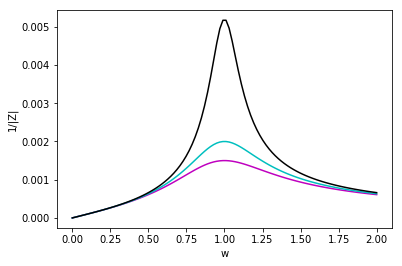

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

R1= 1000/1.5
R2= 1000/2
R3= 1000/5.2
w= np.linspace(0,2/(L*C)**0.5,100)
Z1=np.linspace(0,10,100)
Z2=np.linspace(0,10,100)
Z3=np.linspace(0,10,100)


for i in range(100):
    Z1[i] = 1.0/(Complex2.abs(Complex2(R1, (1.0/(w[i]*C)-(L*w[i])))))
    
for i in range(100):
    Z2[i] = 1.0/(Complex2.abs(Complex2(R2, (1.0/(w[i]*C)-(L*w[i])))))
    
for i in range(100):
    Z3[i] = 1.0/(Complex2.abs(Complex2(R3, (1.0/(w[i]*C)-(L*w[i])))))


%matplotlib inline
plt.plot(w,Z1,'m')
a= np.max(Z1)
b= np.min(Z1)
print("Valor maximo da resistência R1 é:", a ,"e o valor mínimo é:",b)
plt.plot(w,Z2,'c')
c= np.max(Z2)
d= np.min(Z2)
print( )
print("Valor maximo da resistência R2 é:", c ,"e o valor mínimo é:",d)
plt.plot(w,Z3,'k')
e= np.max(Z3)
f= np.min(Z3)
print( )
print("Valor maximo da resistência R3 é:", e ,"e o valor mínimo é:",f)
plt.ylabel('1/|Z|')
plt.title(' ')

plt.xlabel('w')
plt.show()


## 3- Theta vs w


Nesse gráfico é possível ver que existe um valor da frequência em que todos os angulos são zero, fato que implica que os cossenos serão todos 1 e a corrente ser máxima, isto é existe uma frequência de ressonância 








/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


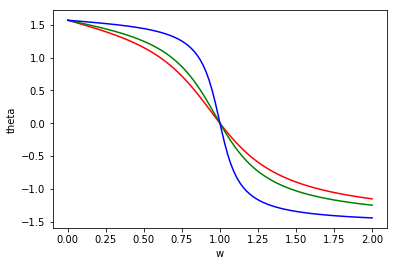

In [12]:
ang1 = []
ang2 = []
ang3 = []

for i in range(100):
    ang1.append(np.arctan(((1/(w[i]*C)) - w[i]*L)/R1))
    
for i in range(100):
    ang2.append(np.arctan(((1/(w[i]*C)) - w[i]*L)/R2))
    
for i in range(100):
    ang3.append(np.arctan(((1/(w[i]*C)) - w[i]*L)/R3))



%matplotlib inline
plt.plot(w,ang1,'r')
plt.plot(w,ang2,'g')
plt.plot(w,ang3,'b')
plt.xlabel('w')
plt.ylabel('theta')
plt.show()


## 4. 1|z| em função de L


Como a impedância (z) é a oposição que um circuito elétrico faz à passagem de corrente quando é submetido a uma tensão, sabemos que quanto maior for Z menor será a resônancia.Portanto, analisando o gráfico de 1/|z| por L ,notamos que quando maior for o valor de 1/|Z| maior será a renônancia,pois significa que Z está se tornando cada vez menor. Com isso, conclui-se que o circuito é resonante no pico do gráfico,no qual o valor da indutância é de 440Henry.
 


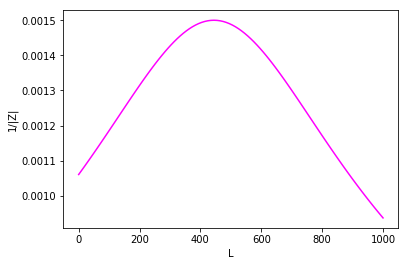

O valor de L onde o circuito eh resonante eh: 440


In [13]:
w = 1.5
R = 1000/1.5
C = 1./1000
L = np.linspace(0,1000,100)
iw = []

for i in range(100):
    iw.append(1/Complex2.abs(Complex2(R,(1/(w*C))-w*L[i])))
    
%matplotlib inline
plt.plot(L,iw,'fuchsia')
plt.xlabel('L')
plt.ylabel('1/|Z|')
a = np.argmax(iw)
plt.show()

print("O valor de L onde o circuito eh resonante eh:",a*10)
